#### About this file

Add Suggestion
Predicting Anaemia from Image Pixels and Hemoglobin Levels
Dataset
* Description:**
This dataset is curated to facilitate the development of machine learning models aimed at predicting Predicting Anaemia from Image Pixels and Hemoglobin Levels
Dataset Description:
This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features

*Columns:
Number:
Type: Integer
Description:
A unique identifier for each individual case.
Sex:
Type: Categorical (Male, Female)
Description: The sex of the individual.
%Red Pixel:
Type: Float
Description: The percentage of red pixels in the image associated with the case.
%Green Pixel:
Type: Float
Description: The percentage of green pixels in the image associated with the case.
%Blue Pixel:
Type: Float
Description: The percentage of blue pixels in the image associated with the case.
Hb:
Type: Float
Description: Hemoglobin level of the individual, measured in grams per deciliter (g/dL).
Anaemic:
Type:Catagorical (Yes | No )
Description: An indicator of anaemia status (1 for anaemic, 0 for not anaemic).
Usage
This dataset can be utilized for:

*Developing and testing machine learning models to predict *anaemia.* Analyzing the correlation between hemoglobin levels and color pixel distribution in images. Educational purposes for learning data preprocessing, feature engineering, and model building. Acknowledgements.
Please ensure proper citation if you use this dataset in your research or project. We appreciate your feedback and suggestions for improving the dataset.


In [214]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to build model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# to check performane
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier

In [15]:
data=pd.read_csv("animies.csv")
df=data.copy()
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [17]:
# checking shape of dataframe
df.shape

(104, 7)

- there are 104 rows and 7 columns.

In [20]:
# checking datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [22]:
# checking statical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,104.0,52.500000,30.166206,1.0000,26.750000,52.50000,78.250000,104.0000
%Red Pixel,104.0,45.654175,2.816294,38.7968,43.911375,45.38535,46.968325,54.6478
%Green pixel,104.0,28.875507,1.554275,25.1403,27.871300,28.94875,29.887275,32.3681
%Blue pixel,104.0,25.470325,1.984671,19.5413,24.896425,25.95320,26.721600,29.8414
Hb,104.0,12.150962,2.512957,2.8000,10.650000,12.60000,14.000000,16.3000


In [26]:
# checking duplicates
df.duplicated().sum()

0

## EDA

In [30]:
df.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

#### Number 

In [55]:
# checking statical summary
df.Number.describe()

count    104.000000
mean      52.500000
std       30.166206
min        1.000000
25%       26.750000
50%       52.500000
75%       78.250000
max      104.000000
Name: Number, dtype: float64

<Axes: xlabel='Number'>

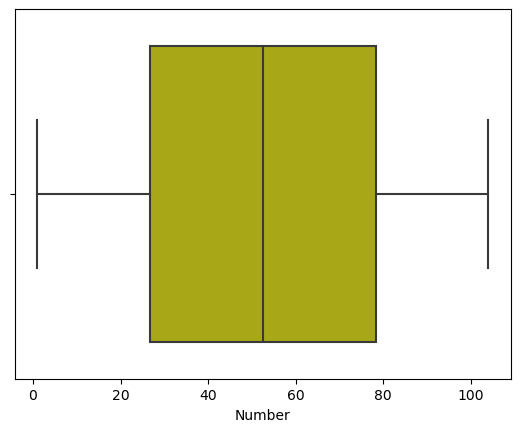

In [61]:
# visualizing Number feature
sns.boxplot(df,x="Number",color="y")

#### Sex

In [65]:
# checking value counts
df.Sex.value_counts()

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

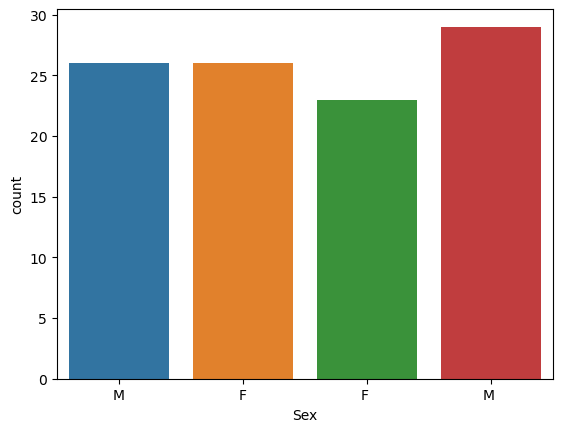

In [69]:
# checking values
sns.countplot(df,x="Sex",);

#### %Red Pixel

In [73]:
# checking value
df["%Red Pixel"].describe()

count    104.000000
mean      45.654175
std        2.816294
min       38.796800
25%       43.911375
50%       45.385350
75%       46.968325
max       54.647800
Name: %Red Pixel, dtype: float64

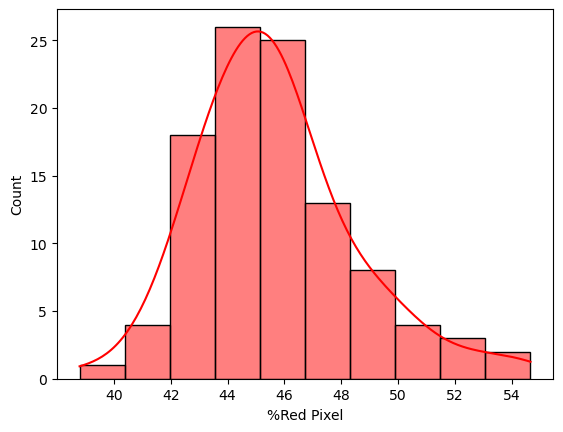

In [119]:
# visualizing red pixel
sns.histplot(df,x="%Red Pixel",color="r",bins=10,kde=True);

#### %Green pixel

In [85]:
# checking statical summary
df["%Green pixel"].describe()

count    104.000000
mean      28.875507
std        1.554275
min       25.140300
25%       27.871300
50%       28.948750
75%       29.887275
max       32.368100
Name: %Green pixel, dtype: float64

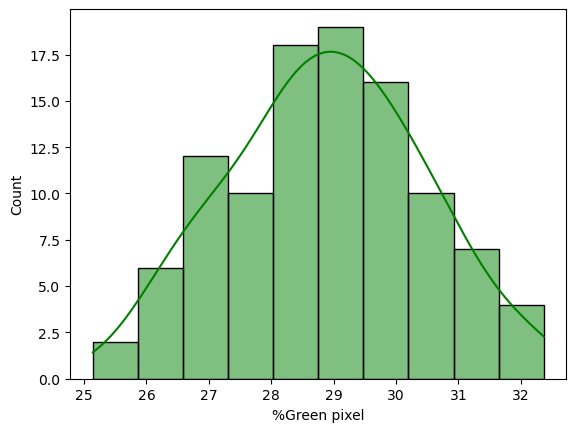

In [117]:
# visualizing red pixel
sns.histplot(df,x="%Green pixel",color="g",bins=10,kde=True);

#### %Blue pixel

In [95]:
# checking discriptive summary
df["%Blue pixel"].describe()

count    104.000000
mean      25.470325
std        1.984671
min       19.541300
25%       24.896425
50%       25.953200
75%       26.721600
max       29.841400
Name: %Blue pixel, dtype: float64

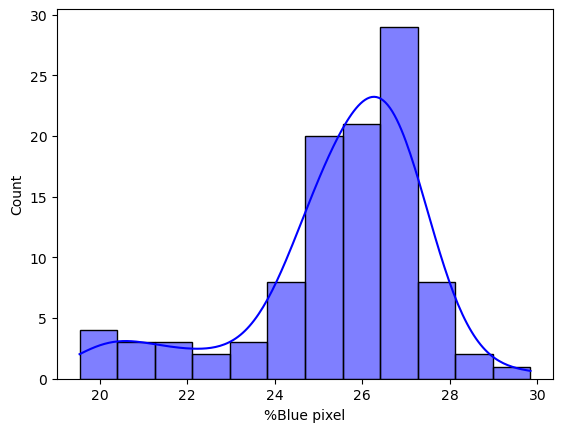

In [115]:
sns.histplot(df,x="%Blue pixel",color="b",bins=12,kde=True);

#### Hb

In [107]:
# checking values of Hb feature
df.Hb.describe()

count    104.000000
mean      12.150962
std        2.512957
min        2.800000
25%       10.650000
50%       12.600000
75%       14.000000
max       16.300000
Name: Hb, dtype: float64

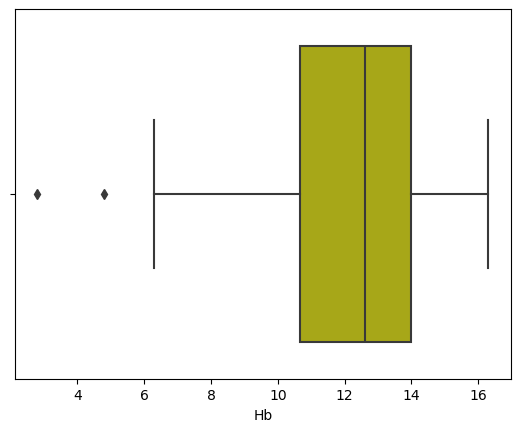

In [125]:
# visual of Hb feature
sns.boxplot(df,x="Hb",color="y",);

#### Anaemic

In [130]:
# checking values
df.Anaemic.value_counts()

Anaemic
No     78
Yes    26
Name: count, dtype: int64

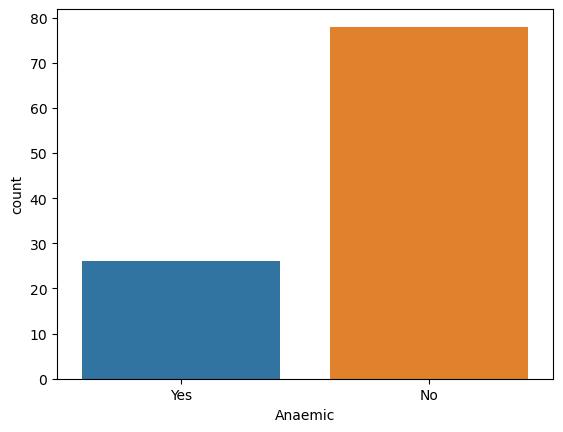

In [134]:
# visual of anaemic
sns.countplot(df,x="Anaemic",);

## Data Preprocessing

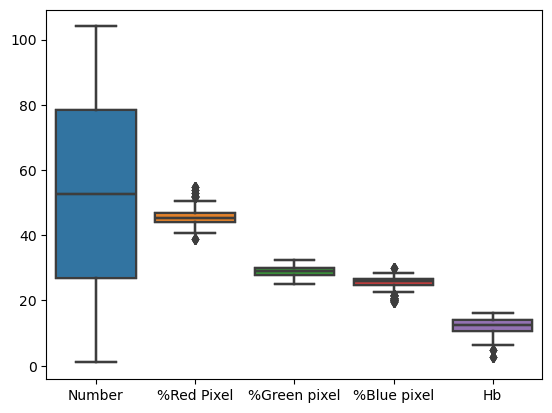

In [137]:
# checking outliers
for i in df:
    sns.boxplot(df)

- there are few outlier present in dataset

In [144]:
# checking corereleation
num_col=df.select_dtypes(include=np.number)
num_col.corr()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
Number,1.000000,0.286166,-0.077089,-0.345707,-0.019768
%Red Pixel,0.286166,1.000000,-0.732003,-0.845764,0.424586
%Green pixel,-0.077089,-0.732003,1.000000,0.255589,-0.637340
%Blue pixel,-0.345707,-0.845764,0.255589,1.000000,-0.103373
Hb,-0.019768,0.424586,-0.637340,-0.103373,1.000000


- blue and red pixel are strongly negative coreleated.
- gren and red pixel are strongly negative coreleated.
- Hb and green are negative coreleated.


In [202]:
# copying data
df1=df.copy()

In [204]:
# converting categorical to numeric type so can use in ml
sex = {"M": 1, "F": 0}
df1["Sex"] = df1["Sex"].str.strip().str.upper().map(sex)


In [206]:
# converting categorical to numeric type so can use in ml
ana = {"Yes": 1, "No": 0}
df1["Anaemic"] = df1["Anaemic"].map(ana)


In [208]:
df1.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0


#### Spliting data into train and test

In [211]:
# Split the data into features (X) and target variable (y)
X = df1.drop("Anaemic", axis=1)  # Assuming "Anaemic" is the target variable
y = df1["Anaemic"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (83, 6)
Shape of X_test: (21, 6)
Shape of y_train: (83,)
Shape of y_test: (21,)


## Checking cv score 

In [216]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [220]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [222]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [224]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0


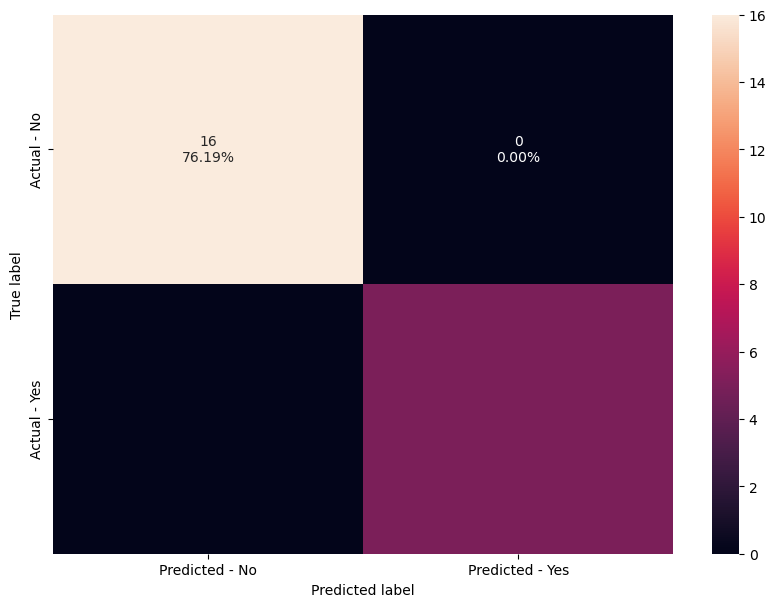

In [226]:
make_confusion_matrix(abc,y_test)

- we getting 100% of precision,recall and accuracy. lets tune model

In [229]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [230]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9879518072289156
Accuracy on test set :  1.0
Recall on training set :  0.9523809523809523
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0


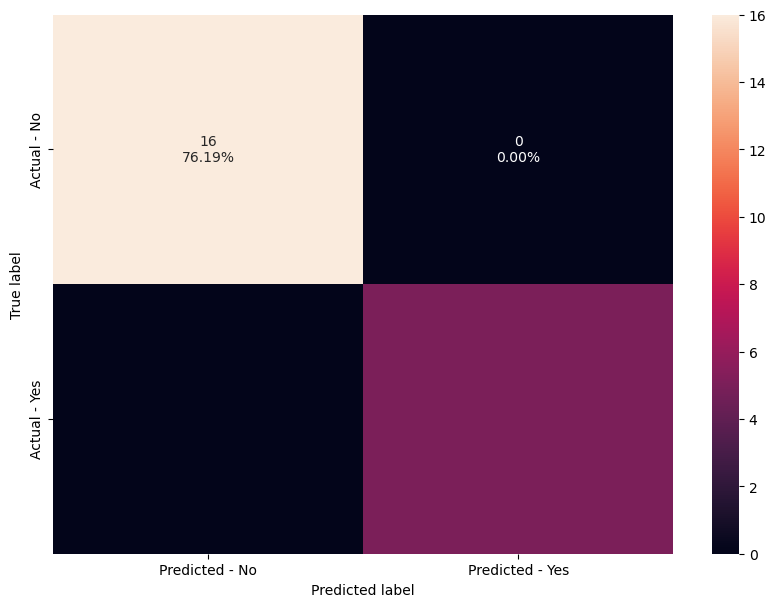

In [231]:
make_confusion_matrix(abc_tuned,y_test)

- adaboost is performing well .it will perform well in future.
- recall,precision is 100% and accuracy is around 95%

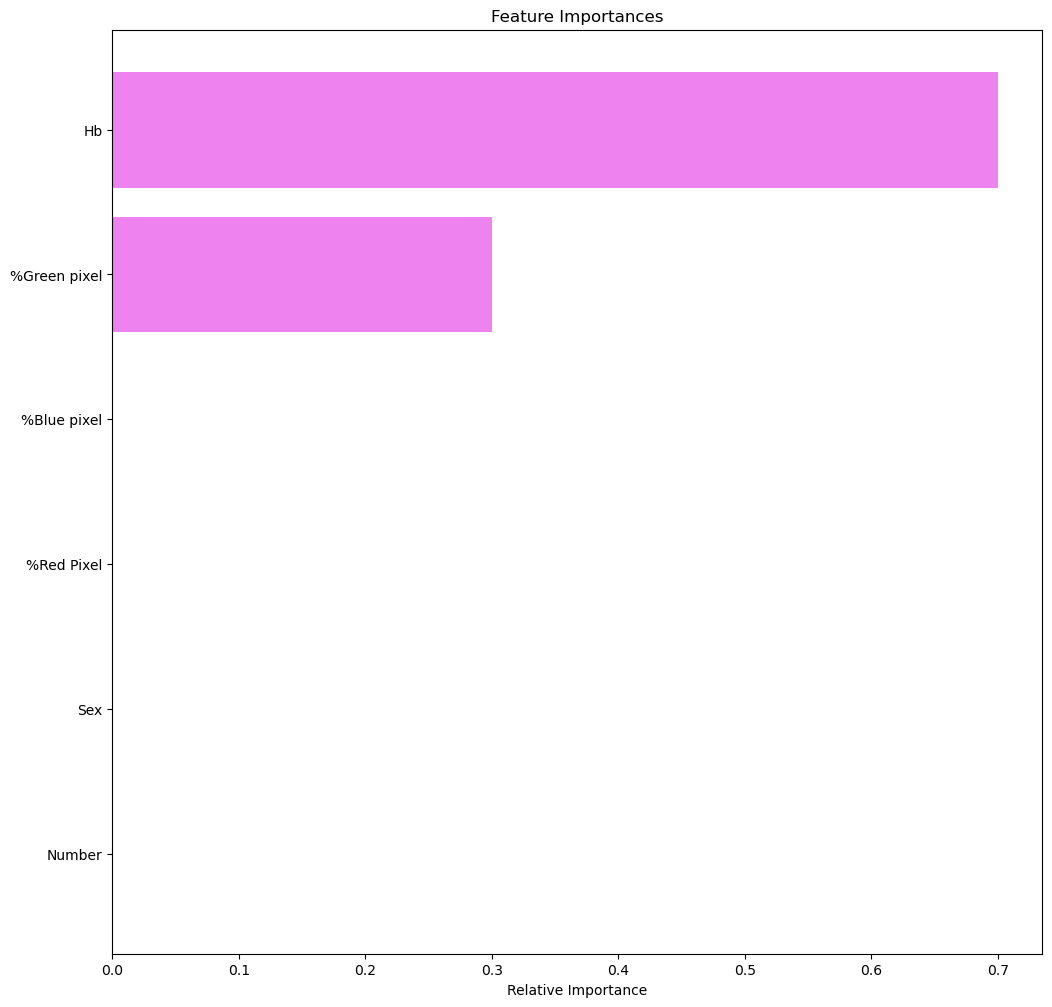

In [232]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- most important feature is Hb followed by % Green pixel.

## Pipeline

In [246]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Define the steps in the pipeline
steps = [
    ('scaler', StandardScaler()),  # Step 1: Preprocessing - StandardScaler
    ('classifier', AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),  # Base estimator
        n_estimators=50,  # Number of weak learners (trees) to train
        learning_rate=1.0  # Weight applied to each classifier
    ))  # Step 2: Model - AdaBoostClassifier
]

# Create the pipeline
pipeline = Pipeline(steps)

# Separate features (X) and target variable (y)
X = df1.drop("Anaemic", axis=1)  # Features
y = df1["Anaemic"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline (including scaling) on the training data
pipeline.fit(X_train, y_train)

# Evaluate on the test set
test_score = pipeline.score(X_test, y_test)
print("Test set score:", test_score)


Test set score: 1.0


- Test score is 100%

## Business recommendation

         - Accuracy =96%
         - precision=100%
         - Recall   =100%
- most important feature is Hb followed by %Green pixel.
- These metrics collectively suggest that the model performs very well in terms of precision and recall, especially in correctly identifying positive instances. The high precision and recall values (both at 100%) indicate that the model is very reliable and accurate in its predictions, particularly for the class or condition  and it is designed to detect.